In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zinakamel","key":"4cecbeb57e27d799207869ee8c577d35"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d gpiosenka/100-bird-species

100% 886M/889M [00:03<00:00, 238MB/s]
100% 889M/889M [00:03<00:00, 234MB/s]


In [5]:
from zipfile import ZipFile
file_name = "/content/100-bird-species.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img,img_to_array

In [7]:
train_directory='/content/train'
val_directory='/content/valid'
test_directory='/content/test'

In [8]:
train_datagen = ImageDataGenerator(zoom_range=0.2, 
                                   preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input, 
                                   horizontal_flip=True, 
                                   rotation_range=0.2)
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)

In [9]:
train_generator = train_datagen.flow_from_directory(train_directory, 
                                                    target_size=(256,256), 
                                                    batch_size=32, 
                                                    class_mode='categorical', 
                                                    shuffle=True)
val_generator = test_datagen.flow_from_directory(val_directory, 
                                                 target_size=(256,256), 
                                                 batch_size=32, 
                                                 class_mode='categorical', 
                                                 shuffle=False)
test_generator = test_datagen.flow_from_directory(test_directory, 
                                                  target_size=(256,256), 
                                                  batch_size=32, 
                                                  class_mode='categorical', 
                                                  shuffle=True)

Found 39364 images belonging to 275 classes.
Found 1375 images belonging to 275 classes.
Found 1375 images belonging to 275 classes.


In [10]:
import os
classes = os.listdir(train_directory)
print("Total Classes: ",len(classes))

train_count = 0
valid_count = 0
test_count = 0
for _class in classes:
    train_count += len(os.listdir(train_directory + '/' + _class))
    valid_count += len(os.listdir(val_directory + '/' + _class))
    test_count += len(os.listdir(test_directory + '/' + _class))

print("Total train images: ",train_count)
print("Total valid images: ",valid_count)
print("Total test images: ",test_count)

Total Classes:  275
Total train images:  39364
Total valid images:  1375
Total test images:  1375


In [11]:
count = {}
for _class in classes:
  count[_class] = len(os.listdir(train_directory + '/' + _class))
sorted_count = sorted(count.items(), key=lambda item: item[1], reverse=True)
sorted_count = {k: v for k, v in sorted_count} 
print("{" + "\n".join("{!r}: {!r},".format(k, v) for k, v in sorted_count.items()) + "}")

{'HOUSE FINCH': 249,
'OVENBIRD': 233,
'D-ARNAUDS BARBET': 233,
'SWINHOES PHEASANT': 217,
'WOOD DUCK': 214,
'CASPIAN TERN': 213,
'OYSTER CATCHER': 207,
'DARK EYED JUNCO': 203,
'VIOLET GREEN SWALLOW': 201,
'SORA': 200,
'MARABOU STORK': 197,
'RED BEARDED BEE EATER': 197,
'NORTHERN PARULA': 196,
'RAZORBILL': 194,
'BANDED BROADBILL': 194,
'VARIED THRUSH': 193,
'SPOONBILL': 192,
'EASTERN MEADOWLARK': 190,
'RUFUOS MOTMOT': 189,
'INDIAN PITTA': 186,
'BLUE GROUSE': 185,
'GREATOR SAGE GROUSE': 184,
'TREE SWALLOW': 181,
'CEDAR WAXWING': 180,
'AMERICAN AVOCET': 179,
'AMERICAN PIPIT': 179,
'FLAME TANAGER': 177,
'COMMON GRACKLE': 177,
'GREEN MAGPIE': 176,
'PARADISE TANAGER': 176,
'GOLDEN CHEEKED WARBLER': 176,
'WHITE TAILED TROPIC': 175,
'KILLDEAR': 175,
'HARPY EAGLE': 175,
'SHOEBILL': 175,
'GLOSSY IBIS': 175,
'PYGMY KINGFISHER': 173,
'AMERICAN BITTERN': 170,
'VULTURINE GUINEAFOWL': 169,
'CHUKAR PARTRIDGE': 168,
'BLACK-THROATED SPARROW': 168,
'BLUE HERON': 167,
'STRAWBERRY FINCH': 167,
'RED FACED WA

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


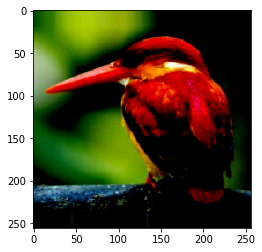

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


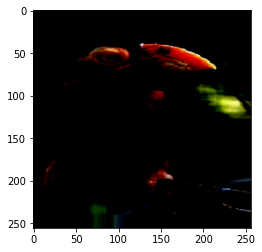

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


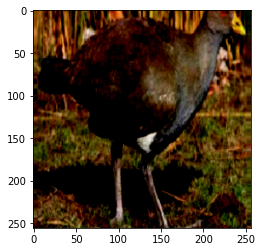

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


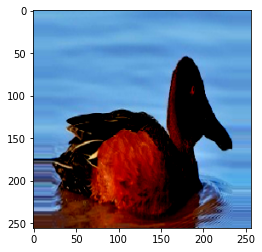

In [12]:
x= train_generator.next()
for i in range(0,4):
    image = x[0][i]
    plt.imshow(image)
    plt.show()

In [13]:
train_generator.class_indices

{'AFRICAN CROWNED CRANE': 0,
 'AFRICAN FIREFINCH': 1,
 'ALBATROSS': 2,
 'ALEXANDRINE PARAKEET': 3,
 'AMERICAN AVOCET': 4,
 'AMERICAN BITTERN': 5,
 'AMERICAN COOT': 6,
 'AMERICAN GOLDFINCH': 7,
 'AMERICAN KESTREL': 8,
 'AMERICAN PIPIT': 9,
 'AMERICAN REDSTART': 10,
 'ANHINGA': 11,
 'ANNAS HUMMINGBIRD': 12,
 'ANTBIRD': 13,
 'ARARIPE MANAKIN': 14,
 'ASIAN CRESTED IBIS': 15,
 'BALD EAGLE': 16,
 'BALI STARLING': 17,
 'BALTIMORE ORIOLE': 18,
 'BANANAQUIT': 19,
 'BANDED BROADBILL': 20,
 'BAR-TAILED GODWIT': 21,
 'BARN OWL': 22,
 'BARN SWALLOW': 23,
 'BARRED PUFFBIRD': 24,
 'BAY-BREASTED WARBLER': 25,
 'BEARDED BARBET': 26,
 'BEARDED REEDLING': 27,
 'BELTED KINGFISHER': 28,
 'BIRD OF PARADISE': 29,
 'BLACK & YELLOW bROADBILL': 30,
 'BLACK FRANCOLIN': 31,
 'BLACK SKIMMER': 32,
 'BLACK SWAN': 33,
 'BLACK TAIL CRAKE': 34,
 'BLACK THROATED BUSHTIT': 35,
 'BLACK THROATED WARBLER': 36,
 'BLACK VULTURE': 37,
 'BLACK-CAPPED CHICKADEE': 38,
 'BLACK-NECKED GREBE': 39,
 'BLACK-THROATED SPARROW': 40,
 'BL

In [14]:
import keras
base_model = tf.keras.applications.InceptionResNetV2(include_top=False, 
                                                     input_shape=(256,256,3))

219062272/219055592 [==============================] - 2s 0us/step


In [15]:
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
model = tf.keras.Sequential([base_model, 
                             tf.keras.layers.GlobalAveragePooling2D(), 
                             tf.keras.layers.Dense(275, activation='softmax')])

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 6, 6, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 275)               422675    
Total params: 54,759,411
Trainable params: 54,698,867
Non-trainable params: 60,544
_________________________________________________________________
None


In [18]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', verbose=1, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=1)
]

In [19]:
history = model.fit(train_generator, 
                    validation_data=val_generator, 
                    epochs=8, 
                    callbacks=callbacks, 
                    verbose=1)

Epoch 1/8
1231/1231 [==============================] - 973s 751ms/step - loss: 2.0976 - accuracy: 0.5468 - val_loss: 0.8420 - val_accuracy: 0.7731
Epoch 2/8
1231/1231 [==============================] - 919s 746ms/step - loss: 0.5082 - accuracy: 0.8660 - val_loss: 0.3274 - val_accuracy: 0.9062
Epoch 3/8
1231/1231 [==============================] - 917s 744ms/step - loss: 0.3409 - accuracy: 0.9066 - val_loss: 0.4920 - val_accuracy: 0.8567

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/8
1231/1231 [==============================] - 917s 744ms/step - loss: 0.1396 - accuracy: 0.9618 - val_loss: 0.1039 - val_accuracy: 0.9716
Epoch 5/8
1231/1231 [==============================] - 917s 745ms/step - loss: 0.1048 - accuracy: 0.9712 - val_loss: 0.0902 - val_accuracy: 0.9745
Epoch 6/8
1231/1231 [==============================] - 916s 744ms/step - loss: 0.0878 - accuracy: 0.9749 - val_loss: 0.0984 - val_accuracy: 0.9753

Epoch 00006: ReduceLROnPlateau reduc

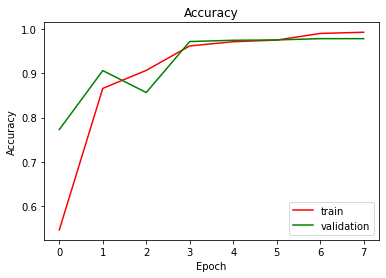

In [20]:
plt.plot(history.history['accuracy'],c='red')
plt.plot(history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

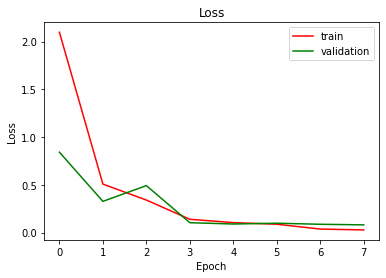

In [21]:
plt.plot(history.history['loss'],c='red')
plt.plot(history.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

In [22]:
model.evaluate(test_generator)

43/43 [==============================] - 10s 232ms/step - loss: 0.0648 - accuracy: 0.9847


[0.06477627903223038, 0.9847272634506226]

In [26]:
dic=train_generator.class_indices
icd={k:v for v,k in dic.items()}
def output(location):
    img=load_img(location,target_size=(256,256,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=np.argmax(model.predict(img), axis=-1)
    probability=round(np.max(model.predict(img)*100),2)
    #print ('Bird Is',icd[answer[0]], 'With probability',probability)
    print (probability, ' % chances are there that the Bird Is',icd[answer[0]])

99.89  % chances are there that the Bird Is BELTED KINGFISHER


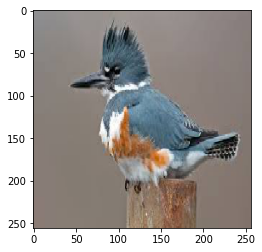

In [27]:
img='/content/download.jpg'
pic=load_img('/content/download.jpg',target_size=(256,256,3))
plt.imshow(pic)
output(img)

99.93  % chances are there that the Bird Is ARARIPE MANAKIN


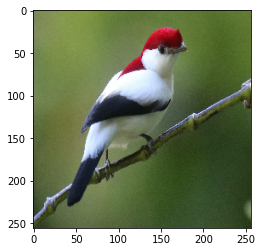

In [29]:
img='/content/araripe.jpg'
pic=load_img('/content/araripe.jpg',target_size=(256,256,3))
plt.imshow(pic)
output(img)

In [30]:
model.save('birds_classify.h5')